In [ ]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import tensorflow as tf
from tensorflow import keras
import random

In [ ]:
# Set random seed
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of numbers will appear every time.
tf.random.set_seed(42)  # sets the graph-level random seed

In [ ]:
imdb = keras.datasets.imdb

max_features = 20000

(Xtrain, Ytrain), (Xtest, Ytest) = imdb.load_data(num_words = max_features)


# Downloading data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/imdb.npz
# 17465344/17464789 [==============================] - 8s 0us/step


print(len(Xtrain), len(Ytrain))
print(len(Xtest), len(Ytest))

Xtrain = keras.preprocessing.sequence.pad_sequences(Xtrain, maxlen =25)
Xtest = keras.preprocessing.sequence.pad_sequences(Xtest, maxlen =25)

print(len(Xtrain), len(Ytrain))
print(len(Xtest), len(Ytest))

17464789/17464789 [==============================] - 0s 0us/step
25000 25000
25000 25000
25000 25000
25000 25000


In [ ]:
lstmModel = keras.models.Sequential()

lstmModel.add(keras.layers.Embedding(input_dim = max_features, output_dim = 128))

lstmModel.add(keras.layers.LSTM(128, dropout=0.2)) #, recurrent_dropout=0.2

lstmModel.add(keras.layers.Dense(1, activation = 'sigmoid'))

lstmModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2691713 (10.27 MB)
Trainable params: 2691713 (10.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize.
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing.

lstmModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# train the model

history = lstmModel.fit(Xtrain, Ytrain, epochs = 15, batch_size=16, validation_split=0.2, verbose=1 )

Epoch 1/15
1250/1250 [==============================] - 105s 82ms/step - loss: 0.5091 - accuracy: 0.7404 - val_loss: 0.4697 - val_accuracy: 0.7642
Epoch 2/15
1250/1250 [==============================] - 102s 82ms/step - loss: 0.3505 - accuracy: 0.8442 - val_loss: 0.4822 - val_accuracy: 0.7648
Epoch 3/15
1250/1250 [==============================] - 99s 79ms/step - loss: 0.2359 - accuracy: 0.9050 - val_loss: 0.5855 - val_accuracy: 0.7598
Epoch 4/15
1250/1250 [==============================] - 76s 61ms/step - loss: 0.1487 - accuracy: 0.9417 - val_loss: 0.6716 - val_accuracy: 0.7592
Epoch 5/15
1250/1250 [==============================] - 92s 73ms/step - loss: 0.0905 - accuracy: 0.9663 - val_loss: 1.0947 - val_accuracy: 0.7470
Epoch 6/15
1250/1250 [==============================] - 98s 79ms/step - loss: 0.0587 - accuracy: 0.9793 - val_loss: 1.1312 - val_accuracy: 0.7472
Epoch 7/15
1250/1250 [==============================] - 96s 76ms/step - loss: 0.0353 - accuracy: 0.9876 - val_loss: 1.1297

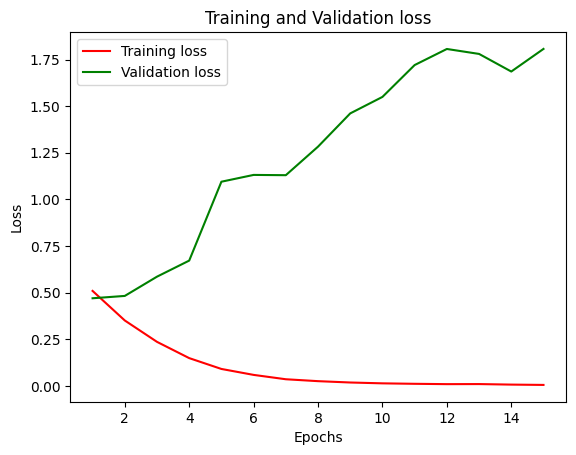

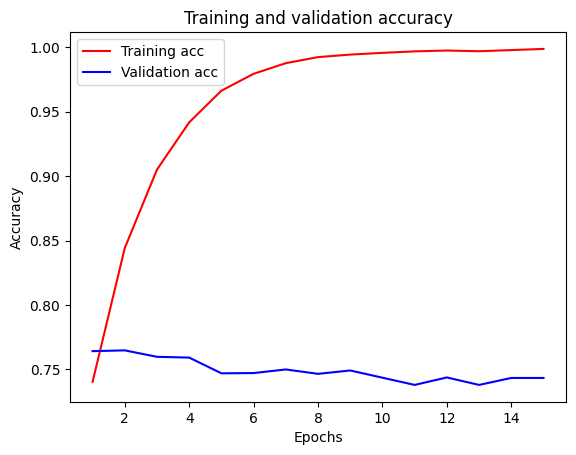

In [ ]:
# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting training and validation accuracy

accuracy = history.history['accuracy']  # Change 'acc' to 'accuracy'
val_acc = history.history['val_accuracy']  # Change 'val_acc' to 'val_accuracy'

plt.plot(epochs, accuracy, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
testLoss, testAccuracy = lstmModel.evaluate(Xtest, Ytest)
print(testLoss, testAccuracy)

782/782 [==============================] - 15s 18ms/step - loss: 1.7692 - accuracy: 0.7419
1.7692248821258545 0.7418799996376038
